In [2]:
import pandas as pd
import numpy as np
import math
import itertools
import sys
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import Image

In [40]:
# How likely is it that you roll doubles when rolling two dice?


nrows = 100000
n_dice = ncols = 2
dice_sides = 6
sided_dice = list(range(1, 1 + dice_sides))

print(sided_dice)
random_rolls = np.random.choice(sided_dice, nrows * n_dice).reshape(nrows, ncols)
rolls = pd.DataFrame(random_rolls)

rolls = rolls.apply(lambda x: x[0] == x[1], axis =1)

print(rolls.mean())

[1, 2, 3, 4, 5, 6]
0.16601


In [62]:
# If you flip 8 coins, what is the probability of getting exactly 3 
# heads? What is the probability of getting more than 3 heads?

n_rows = 5000
n_coins = ncols = 8
coin = [0,1]  # heads == 1

flips = pd.DataFrame(np.random.choice(coin, nrows * ncols).reshape(nrows, ncols))


probability = flips.apply(lambda x: x.sum() == 3, axis=1).mean()
print(f'Percent probability for exactly 3 heads: {round(probability * 100, 2)}%')

probability = flips.apply(lambda x: x.sum() > 3, axis=1).mean()
print(f'Percent probability for > 3 heads: {round(probability * 100, 2)}%')


   0  1  2  3  4  5  6  7
0  1  1  1  1  0  1  0  0
1  0  1  1  0  1  1  1  0
2  1  1  0  1  0  1  0  1
3  0  1  0  0  1  1  0  1
4  0  1  1  0  0  0  0  1
Percent probability for exactly 3 heads: 21.9%
Percent probability for > 3 heads: 63.65%


In [74]:
# 3: There are approximitely 3 web development cohorts for every 1 
# data science cohort at Codeup. Assuming that Codeup randomly selects 
# an alumni to put on a billboard, what are the odds that the two 
# billboards I drive past both have data science students on them?

web_dev = 0.75
ds_stud = 0.25

billboards = 2
nrows = 10000
random_array = np.random.random([nrows, billboards])
random_array = random_array < .25
both_ds = random_array.sum(axis=1) == 2
both_ds.mean()


0.0646
0.0625


In [94]:
# 4: Codeup students buy, on average, 3 poptart packages with a 
# standard deviation of 1.5 a day from the snack vending machine. 
# If on monday the machine is restocked with 17 poptart packages, 
# how likely is it that I will be able to buy some poptarts on Friday 
# afternoon? (Remember, if you have mean and standard deviation, use 
# the np.random.normal)
days = 5
nrows = 10000

poptart_dist = pd.DataFrame(np.random.normal(3, 1.5, (nrows, days)))
poptart_dist.apply(lambda x: x.sum() <= 16, axis=1)

probability_of_poptart = poptart_dist.apply(lambda x: x.sum() <= 16, axis=1).mean()
print(f'probability of at least 1 poptart: {round(probability_of_poptart * 100,2)}%')

probability of at least 1 poptart: 61.84%


In [96]:
# 5: Compare Heights

# - Men have an average height of 178 cm and standard deviation of 8cm.
# - Women have a mean of 170, sd = 6cm.

# Since you have means and standard deviations, you can use 
# np.random.normal to generate observations. If a man and woman are 
# chosen at random, what is the likelihood the woman is taller than 
# the man?
nrows = 100000

rand_women = np.random.normal(170, 6, (nrows))
rand_man = np.random.normal(178, 8, (nrows))

stacked = pd.DataFrame(np.stack((rand_man, rand_women), axis=1))
prob_woman_taller = stacked.apply(lambda x: x[1] > x[0], axis=1).mean()
prob_woman_taller

print(f"Probability of rand woman being taller than rand male: {round(prob_woman_taller * 100, 2)}%")




Probability of rand woman being taller than rand male: 21.25%


In [111]:
# 6: When installing anaconda on a student's computer, there's a 1 in 
# 250 chance that the download is corrupted and the installation fails. 
# What are the odds that after having 50 students download anaconda, 
# no one has an installation issue? 100 students?

def issue_within_n_students(nstudents, nrows= 100000,corrupt_chance= 1/250, noissue=False):
    batches_of_students = pd.DataFrame(np.random.random([nrows, nstudents]))
    is_corrupt = batches_of_students.apply(lambda x: x < corrupt_chance, axis=1)
    if noissue:
        return 1 - is_corrupt.apply(lambda x: x.mean() > 0, axis=1).mean()
    else:
    
        return is_corrupt.apply(lambda x: x.mean() > 0, axis=1).mean()

print(f'prob of no issues within 50 students: {issue_within_n_students(50, noissue=True)*100}%')
print(f'prob of no issues within 100 students: {issue_within_n_students(100, noissue=True)*100}%')
      
# What is the probability that we observe an installation issue within 
# the first 150 students that download anaconda?

print(f'prob of having an issue within 150 students: {issue_within_n_students(150)*100}%')



# How likely is it that 450 students all download anaconda without an issue?

print(f'prob of having no issues within 450 students: {issue_within_n_students(450, noissue=True)*100}%')

prob of no issues within 50 students: 81.991%
prob of no issues within 100 students: 66.867%
prob of having an issue within 150 students: 45.190999999999995%
prob of having no issues within 450 students: 16.715000000000003%


In [124]:
# 7: There's a 70% chance on any given day that there will be at least 
# one food truck at Travis Park. However, you haven't seen a food truck
# there in 3 days. How unlikely is this?

days = 3
nrows = 10000

random_values = pd.DataFrame(np.random.random([nrows, days]))
our_filter = random_values.apply(lambda x: x > .7, axis = 1)
three_days_no_food_truck = our_filter.apply(lambda x: x.sum() == 3, axis=1).mean()
answer = (1 - three_days_no_food_truck) * 100
print(answer)

# How likely is it that a food truck will show up sometime this week?

days = 7
nrows = 10000

random_values = pd.DataFrame(np.random.random([nrows, days]))
our_filter = random_values.apply(lambda x: x < .7, axis = 1)
some_day_this_week = our_filter.apply(lambda x: x.sum() > 0, axis=1).mean()
print(some_day_this_week)

97.19
0.9996


In [ ]:
# 8: If 23 people are in the same room, what are the odds that two of 
# them share a birthday? What if it's 20 people? 40?

ncols = npeople = 23
def chance_to_share_bday(n=23):
    pairs = n * (n-1) / 2
    per_chance = (364/365)**pairs

    print(1 - per_chance)
    return 1 - per_chance

# 23 people
print(chance_to_share_bday())

# 20 people
print(chance_to_share_bday(n=20))

# 40 people
print(chance_to_share_bday(n=40))

def chance_bday_numbers(nppl=23, nrows=40000):
    bdays = pd.DataFrame(np.random.choice(list(range(1,365)), (nrows, nppl)))
    bdays = bdays.apply(lambda x: x.nunique() < len(x), axis=1)
    return bdays.mean()  

print(chance_bday_numbers())
print(chance_bday_numbers(20))
print(chance_bday_numbers(40))
    
    



5
4
5
5
5
5
1
4
3
2
4
Kyle
     name mage_h mage_a enemy_name enemy_h enemy_a  wins  draws  losses  \
0    Kyle    4d6    6d5     Andrew     4d4     5d4  1294    688      18   
1    Kyle    4d6    6d5   Deangelo     3d4     3d3  1978     22       0   
2    Kyle    4d6    6d5    Lincoln     4d5     6d5   411   1434     155   
3    Kyle    4d6    6d5      Mindy     5d3     5d6   552   1399      49   
4    Kyle    4d6    6d5       Greg     6d5     4d4   802   1042     156   
..    ...    ...    ...        ...     ...     ...   ...    ...     ...   
105  Ryan    5d5    5d4       Greg     6d5     4d4   147   1713     140   
106  Ryan    5d5    5d4    Stephen     4d4     5d4  1123    772     105   
107  Ryan    5d5    5d4        Jen     4d4     3d4  1432    561       7   
108  Ryan    5d5    5d4      Jason     3d4     5d6   646   1244     110   
109  Ryan    5d5    5d4   Ravinder     5d3     5d5   813    957     230   

     battles  
0       2000  
1       2000  
2       2000  
3       2000

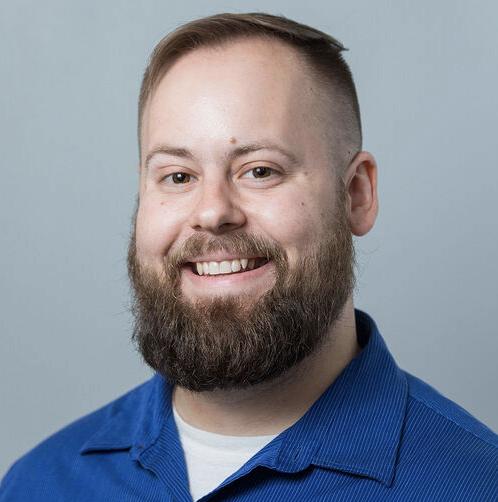

In [19]:
"""
Let's use what we've learned to play a mage duel!

Imagine your wizard has 6d4 health points and you have spells that do 
6d4 damage. "6d4" means rolling six 4-sided dice and summing the result.

Your opposing mage has 4d6 health points and spells that do 4d6. "4d6"
means rolling four six-sided dice and summing the result.

"""

# 1: Before running simulations, do you have a hypothesis of which mage
# will win? Do you have a hunch? Write it down. This is your first 
# exercise.

#ANSWER: I think the opposing mage will win



def make_column_headers(input_string, n):
    my_list = [f'{input_string[0]}{str(x)}' for x in n]
    return my_list
    

class Mage:
    # record of all instantiated mages
    all_mages = []
    mage_objs = {}
    total_history = pd.DataFrame()
    all_data = pd.DataFrame()
    
    
    def __init__(self, name, role='', health='', attack=''):
        # mage's name
        self.name = name
        self.role = role
        
        # if a role is passed, create stats based off of role values
        if self.role:
            self.the_stats = self.create_stats(self.role)
            self.string_stats = pd.DataFrame({'name': [self.name],
                                'mage_h': [self.the_stats[0].astype('str') + "d" + self.the_stats[1].astype('str')],
                                 'mage_a': [str(self.the_stats[2]) + "d" + str(self.the_stats[3])]})
            self.the_stats = {'# health dice': self.the_stats[0],
                             '# health dice sides': self.the_stats[1],
                             '# attack dice': self.the_stats[2],
                             '# attack dice sides': self.the_stats[3]}
    
            # initializing base stat string
            self.health = str(self.the_stats['# health dice']) + 'd' + str(self.the_stats['# health dice sides'])
            self.attack = str(self.the_stats['# attack dice']) + 'd' + str(self.the_stats['# attack dice sides'])

            # describes number of health dice, number of sides on health dice
            self.dice_sides_health = list(range(1, int(self.the_stats['# health dice sides'])+1))
            self.n_dice_health = list(range(1, int(self.the_stats['# health dice'])+1))

            # describes number of attack dice, number of sides on attack dice
            self.dice_sides_attack = list(range(1, int(self.the_stats['# attack dice sides'])+1))
            self.n_dice_attack = list(range(1, int(self.the_stats['# attack dice'])+1))
        
        elif health and attack:
            # initializing base stat string
            self.health = health
            self.attack = attack

            # describes number of health dice, number of sides on health dice
            self.dice_sides_health = list(range(1, int(self.health[-1])+1))
            self.n_dice_health = list(range(1, int(self.health[0])+1))

            # describes number of attack dice, number of sides on attack dice
            self.dice_sides_attack = list(range(1, int(self.attack[-1])+1))
            self.n_dice_attack = list(range(1, int(self.attack[0])+1))
 
            
        
        # initiate variables
        self.health_rolls = pd.DataFrame()
        self.attack_rolls = pd.DataFrame()
        self.n_duels = 0
        self.results = pd.DataFrame()
        
        # a record of all outcomes for all mage battles
        self.battle_history = pd.DataFrame()
        self.mages = []
        
        # keep record of all instantiated mages
        if self.name not in self.all_mages:
            self.all_mages.append(self.name)
            
            self.mage_objs[self.name] = self
            
        
        # most recent battle
        self.last_battle = pd.DataFrame()
        
    
    def duel_a_mage(self, a_mage, n_duels):
        
        self.n_duels = n_duels
        
        
        # create our own health/attack rolls
        self.health_rolls = pd.DataFrame(np.random.choice((self.dice_sides_health), (n_duels, len(self.n_dice_health))), columns=make_column_headers('health', self.n_dice_health)).sum(axis=1)
        self.attack_rolls = pd.DataFrame(np.random.choice((self.dice_sides_attack), (n_duels, len(self.n_dice_attack))), columns=make_column_headers('attack', self.n_dice_attack)).sum(axis=1)
        
        # create opponents health/attack rolls
        a_mage.health_rolls = pd.DataFrame(np.random.choice((a_mage.dice_sides_health), (n_duels, len(a_mage.n_dice_health)))).sum(axis=1)
        a_mage.attack_rolls = pd.DataFrame(np.random.choice((a_mage.dice_sides_attack), (n_duels, len(a_mage.n_dice_attack)))).sum(axis=1)
        
        
        # make list of mages the opponent pairs
        self.mages = [self, a_mage]
        a_mage.mages = [a_mage, self]
        
        # make n_duels == to # of battles input by function call
        a_mage.n_duels = n_duels
        self.n_duels = n_duels
        
        
        # last battle is most recent battle results
        self.last_battle = self.make_results()
        
        return self.last_battle
    
    # creates structure for columns/rows for battle results    
    def make_results(self):
    
        for n in range(0,2):
            self.mages[n].results = pd.DataFrame(columns=['kills', 'dies'])
            self.mages[n].results.kills = np.where(self.mages[n].attack_rolls > self.mages[n-1].health_rolls, True, False)
            self.mages[n].results.dies = np.where(self.mages[n].health_rolls < self.mages[n-1].attack_rolls, True, False)

            self.mages[n].results['wins'] = np.where((self.mages[n].results.kills == True) & (self.mages[n].results.dies == False), True, False).sum()
            self.mages[n].results['draws'] = self.mages[n].results[['kills', 'dies']].apply(lambda x: sum(x) == 0 or sum(x) == 2, axis=1).sum()
            self.mages[n].results['losses'] = np.where((self.mages[n].results.dies == True) & (self.mages[n].results.kills == False), True, False).sum()

            self.mages[n].all_data = pd.DataFrame({'name': self.mages[n].name,
                                                   'mage_h': self.mages[n].health, 'mage_a': self.mages[n].attack,
                                                   'enemy_name': self.mages[n-1].name, 'enemy_h': self.mages[n-1].health, 'enemy_a': self.mages[n-1].attack,
                                                   'wins': [self.mages[n].results.wins[0]], 'draws': [self.mages[n].results.draws[0]], 
                                                   'losses': [self.mages[n].results.losses[0]], 'battles': [self.n_duels]})
            
            self.mages[n].battle_history = pd.concat([self.mages[n].battle_history, self.mages[n].all_data], ignore_index=True)

        
        self.n_duels = 0
        
        return self.results
    
    # makes all instanstiated mages fight n amount of times
    def everyone_fights(n_duels=0):
        
        mage_combinations = itertools.combinations(Mage.all_mages, r=2)
        mage_combinations = list(mage_combinations)

        for combo in mage_combinations:
            Mage.duel_a_mage(Mage.mage_objs[combo[0]], Mage.mage_objs[combo[1]], n_duels)
            
    # creates a complete df from all mages' battle history
    def create_all_fight_histories():
        Mage.total_history = pd.DataFrame()
        for a_mage in Mage.mage_objs.values():
            Mage.total_history = pd.concat([Mage.total_history, a_mage.battle_history], ignore_index=True)
            
    # displays all battles as a complete df
    def display_all_histories():
        Mage.create_all_fight_histories()
        print(Mage.total_history)
        
    # chooses the name of the mage with the most victories
    def declare_victor():
        aggregate_stats = Mage.total_history.groupby('name', as_index=False).sum().nlargest(n=1, keep='first', columns='wins')
        print(aggregate_stats)
        return aggregate_stats
    
    # displays battle history of a particular mage
    def display_battle_history(self):
        print(self.battle_history)
        return self.battle_history
        
    # displays name, stats, total wins/draws/losses
    def display_battle_summary(self):
        our_mage = pd.DataFrame()
        wins = self.battle_history.wins.sum()
        losses = self.battle_history.losses.sum()
        draws = self.battle_history.draws.sum()
        wld = pd.DataFrame({'wins': [wins], 'draws': [draws], 'losses': [losses]})
        our_mage = pd.concat([self.string_stats, wld], axis=1)
        print(our_mage)
        return our_mage
        
    # displays a picture of the victor     
    def display_victor():
        victor = pd.DataFrame(Mage.declare_victor()).reset_index()
        print(victor.name[0])
        return Image(filename=f'mages/{victor.name[0]}.png',)
        
    # creates w,x,y,z numbers where each number represents 'wdx', 'ydz' dice sets for attk & 
    # hlth
    def create_stats(self,role):
        top_num = 0
        chance = 0
        
        # instructors get higher spread of values
        if role == 'instructor':
            top_num = 9
            chance = .85
        else:
            top_num = 6
            chance = .7
            
        # create a distribution of values skewed based on role
        our_dist = stats.binom(top_num, chance)
        
        # random values from our distribution for attk/hlth dice stats
        print(our_dist.rvs(4)[0])
        return our_dist.rvs(4)
    
    def create_mages_from_list(mage_list, role='other'):
        our_mages = []
        for a_mage in mage_list:
            our_mages.append(Mage(a_mage, role=role))
        return our_mages
            
"""  
Kyle = Mage('Kyle',health='6d4', attack='6d4')
Fred = Mage('Fred', '4d6', '4d6', 'student')
Ryan = Mage('Ryan', role='instructor')
Andrew = Mage('Andrew', '6d5', '6d5', 'student')


# 2: Simulate 10 mage duels. Is there a clear winner? Run that 10 duel 
# simulation again. Was the answer similar?
Kyle.duel_a_mage(Fred, 10)

'''ANSWER: no clear winner, both times'''

# 3: Do the results change much at 100 duels?
Kyle.duel_a_mage(Fred, 100)


'''ANSWER: we seem to win more than we lose'''



# 4: Now, simulate 10,000 mage duels. Is there a a clear winner?
Kyle.duel_a_mage(Fred, 10000)

'''ANSWER: We clearly win more than we lose'''
"""


mages_to_be = ['Kyle', 'Andrew', 'Deangelo', 'Lincoln', 'Mindy', 'Greg', 'Stephen',
             'Jen', 'Jason', 'Ravinder', 'Ryan']

our_mages = Mage.create_mages_from_list(mages_to_be)

print(our_mages[0].name)
Mage.everyone_fights(2000)
Mage.display_all_histories()
Mage.display_victor()
#our_mages[0].display_battle_summary()
